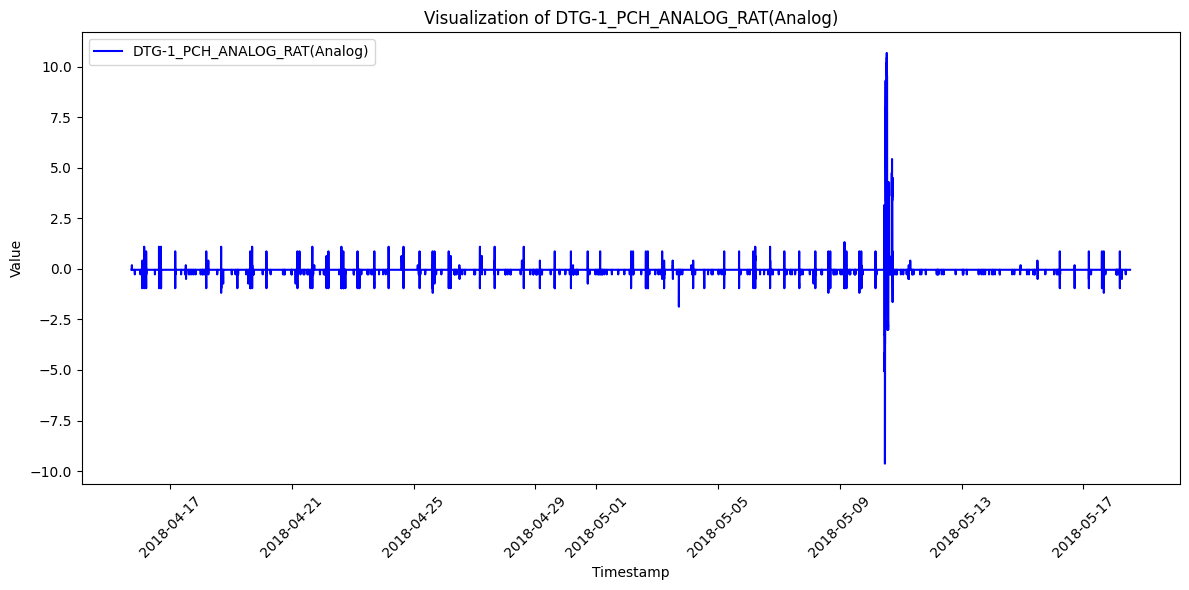

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv("output.csv")

# Convert the `Timestamp` column to a `datetime` object
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

# Plotting
plt.figure(figsize=(12, 6))

# Plot the "DTG-1_PCH_ANALOG_RAT(Analog)" column
plt.plot(data["Timestamp"], data["DTG-1_PCH_ANALOG_RAT(Analog)"], label="DTG-1_PCH_ANALOG_RAT(Analog)", color='blue')

plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Visualization of DTG-1_PCH_ANALOG_RAT(Analog)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv("output.csv")

# Convert the `Timestamp` column to a `datetime` object
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

# Check if the data has at least two rows

timestamp_col = data.columns[0]
numerical_col = data.columns[1]

# Convert the data into a NumPy array, excluding non-numerical columns
data_array = data[numerical_col].to_numpy().reshape(-1, 1)

# Create a LocalOutlierFactor model
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1)  # Adjust parameters as needed

# Fit the LOF model to the data
lof_scores = lof_model.fit_predict(data_array)

# Find the indices of the data points that are outside the range [-3, 3]
anomaly_indices = np.where((data[numerical_col] > 3) | (data[numerical_col] < -3))[0]

# Find the most common value in the second column
most_common_value = data[numerical_col].value_counts().idxmax()




Anomaly: 2018-05-10 10:48:05.756000
sarting of anomaly from : 2018-05-10 10:47:05


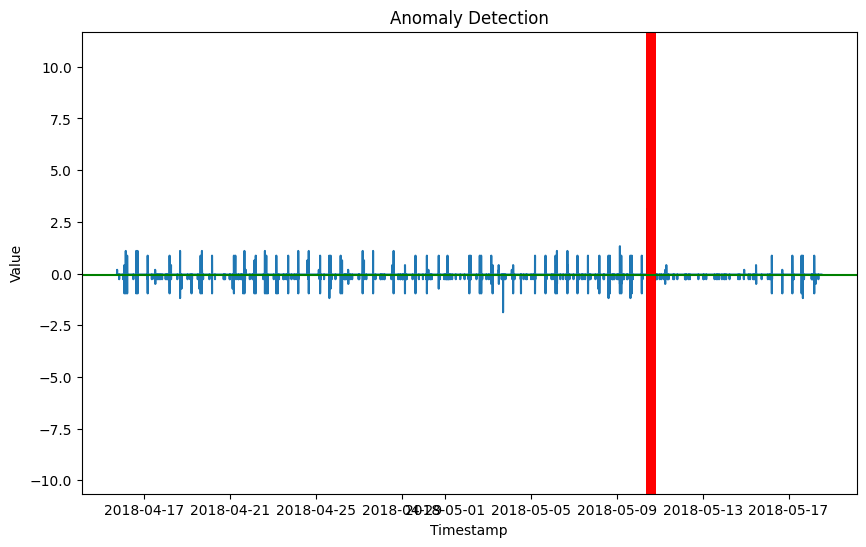

In [5]:

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(data[timestamp_col], data[numerical_col])

# Mark the anomalies
for anomaly_index in anomaly_indices:
    plt.axvline(data[timestamp_col].iloc[anomaly_index], color="red")
if len(anomaly_indices) > 0:
    first_anomaly_index = anomaly_indices[0]
    first_anomaly_timestamp = data[timestamp_col].iloc[first_anomaly_index]
    
    print("Anomaly:", first_anomaly_timestamp)
    previous_second_start = first_anomaly_timestamp - pd.Timedelta(seconds=60)
    least_available_timestamp = previous_second_start.replace(microsecond=0)
    print("sarting of anomaly from :", least_available_timestamp)
# Mark the most common value
plt.axhline(most_common_value, color="green")

# Annotate the plot
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("Anomaly Detection")
plt.show()